<a href="https://colab.research.google.com/github/govinder001/govinder001.github.io/blob/master/ITD214_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
mentalhealth_folder = "sentiment-analysis-for-mental-health"
mentalhealth_url = 'https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health'

In [3]:
pip install opendatasets

In [4]:
import opendatasets
opendatasets.download(mentalhealth_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: govinder001
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health


100%|██████████| 11.1M/11.1M [00:00<00:00, 56.9MB/s]


Create the full path to a file called "***Combined Data.csv***", which is inside a folder named ***mentalhealth_folder***

In [5]:
csv_file = pathlib.Path(mentalhealth_folder) / "Combined Data.csv"

In [6]:
mental = pd.read_csv(csv_file, index_col=0)
mental.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [7]:
mental.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


In [8]:
#Find the number of null values in Statement caused by count differences with Status
mental.isnull().sum()

,0
statement,362
status,0


In [9]:
#Remove the null values

mentalcleaned = mental.dropna()
mentalcleaned.shape

(52681, 2)

In [10]:
#Check the unique values in the Status column and their counts
mental['status'].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


### Exploratory Data Analysis

In [11]:
# Split the statement by spaces & count the length of each statement
mentalcleaned.loc[:, 'statement_len'] = mentalcleaned['statement'].apply(lambda x: len(x.split(' ')))
mentalcleaned.head()

<ipython-input-11-1d18f6bba149>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentalcleaned.loc[:, 'statement_len'] = mentalcleaned['statement'].apply(lambda x: len(x.split(' ')))


,statement,status,statement_len
0,oh my gosh,Anxiety,3
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14
3,I've shifted my focus to something else but I'...,Anxiety,11
4,"I'm restless and restless, it's been a month n...",Anxiety,14


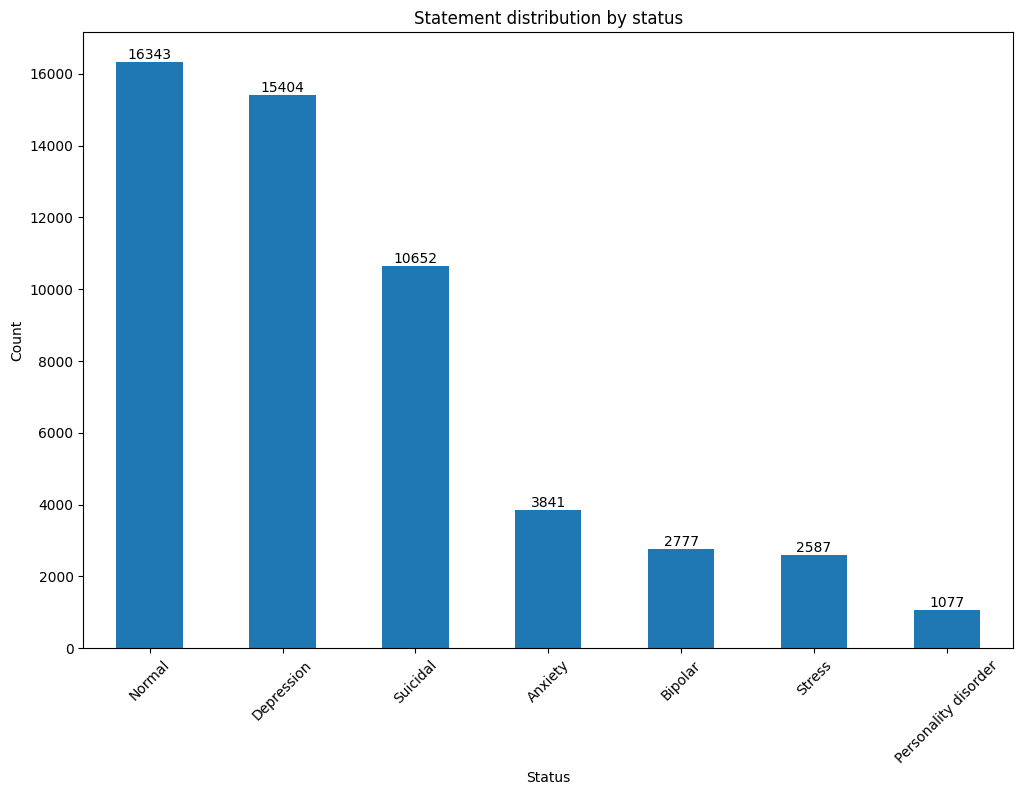

In [12]:
plt.figure(figsize=(12,8))
#Lets get the unique status values & their counts

status_counts = mentalcleaned['status'].value_counts()
ax = status_counts.plot(kind = 'bar')

#add counts
for i, v in enumerate(status_counts):
    ax.text(i,v, str(v), ha = "center", va = "bottom")

plt.title('Statement distribution by status')
plt.xlabel('Status')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

### Clean Corpus

In [13]:
#Clean the Corpus

import re
import string

#re.sub(pattern, repl, string, count=0, flags=0)

def cleantext(text):
    text = str(text).lower() #Convert all to Lower Case
    text = re.sub(r'\[.*?\]', '', text) #remove Square Brackets
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]\(.*?\)', '', text) #remove URLs
    text = re.sub(r'<.*?>', '', text) #remove HTML tags
    text = re.sub(r'@\w+', '', text) #remove handles
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text) #remove punctuations
    text = re.sub(r'\n', ' ', text) #remove newline characters
    text = re.sub(r'\w*\d\w*', '', text) #remove words containing numbers
    text = re.sub(r'\s+', ' ', text) #remove extra spaces

    return text.strip()

mentalcleaned = mentalcleaned.copy()  # Ensure it's a separate DataFrame
mentalcleaned['statement_cleaned'] = mentalcleaned['statement'].apply(cleantext)
mentalcleaned.head()

,statement,status,statement_len,statement_cleaned
0,oh my gosh,Anxiety,3,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shifted my focus to something else but im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,14,im restless and restless its been a month now ...


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

mentalcleaned['statement_cleaned'] = mentalcleaned['statement_cleaned'].apply(remove_stopwords)

mentalcleaned.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,statement,status,statement_len,statement_cleaned
0,oh my gosh,Anxiety,3,oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shifted focus something else still worried
4,"I'm restless and restless, it's been a month n...",Anxiety,14,restless restless month boy mean


### Stemming & Lematization

In [15]:
from nltk.stem import PorterStemmer, SnowballStemmer

stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

mentalcleaned['statement_cleaned'] = mentalcleaned['statement_cleaned'].apply(stemm_text)
mentalcleaned.head()

,statement,status,statement_len,statement_cleaned
0,oh my gosh,Anxiety,3,oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,troubl sleep confus mind restless heart tune
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shift focus someth els still worri
4,"I'm restless and restless, it's been a month n...",Anxiety,14,restless restless month boy mean


### Target Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(mentalcleaned['status'])

mentalcleaned['status_encoded'] = l_encoder.transform(mentalcleaned['status'])
mentalcleaned.head()

,statement,status,statement_len,statement_cleaned,status_encoded
0,oh my gosh,Anxiety,3,oh gosh,0
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,troubl sleep confus mind restless heart tune,0
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...,0
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shift focus someth els still worri,0
4,"I'm restless and restless, it's been a month n...",Anxiety,14,restless restless month boy mean,0


### Token Visualisation

In [17]:
#Manual download packages from link: https://www.nltk.org/nltk_data/

import os
from nltk.tokenize import word_tokenize

nltk.download('punkt') #Downloads the pre-trained tokenizer for word/sentence splitting
nltk.download('punkt_tab')

mentalcleaned['tokens'] = mentalcleaned['statement_cleaned'].apply(word_tokenize) #Splits text into words
mentalcleaned.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,statement,status,statement_len,statement_cleaned,status_encoded,tokens
0,oh my gosh,Anxiety,3,oh gosh,0,"[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,troubl sleep confus mind restless heart tune,0,"[troubl, sleep, confus, mind, restless, heart,..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...,0,"[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shift focus someth els still worri,0,"[ive, shift, focus, someth, els, still, worri]"
4,"I'm restless and restless, it's been a month n...",Anxiety,14,restless restless month boy mean,0,"[restless, restless, month, boy, mean]"


#### Word Cloud

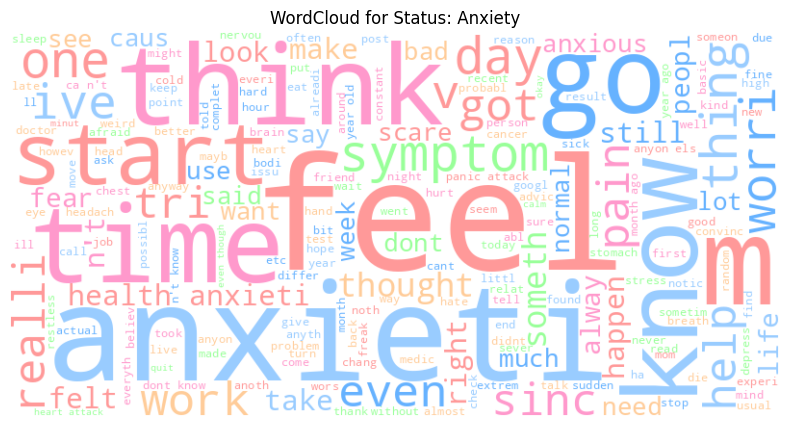

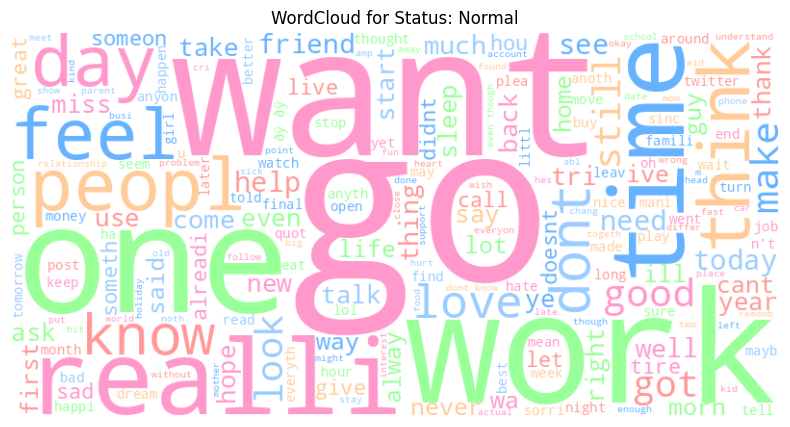

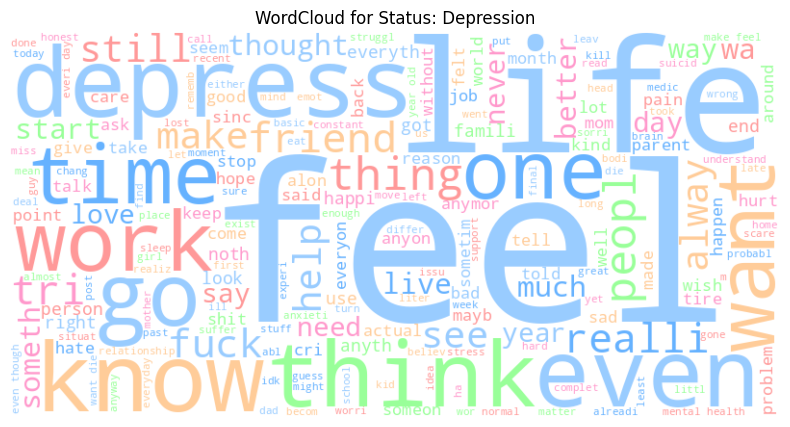

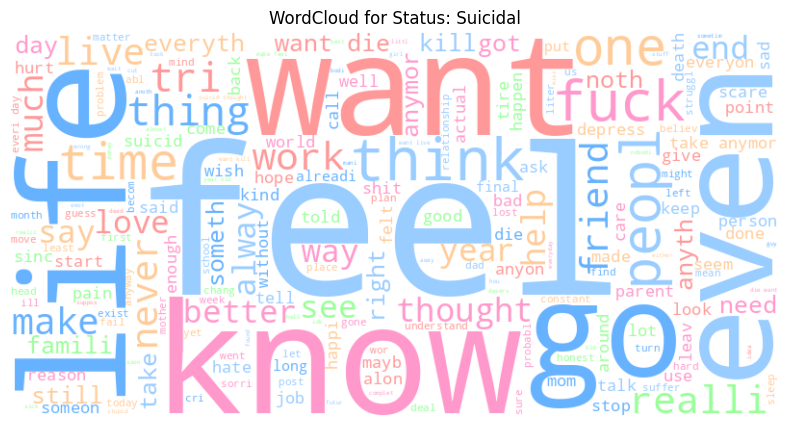

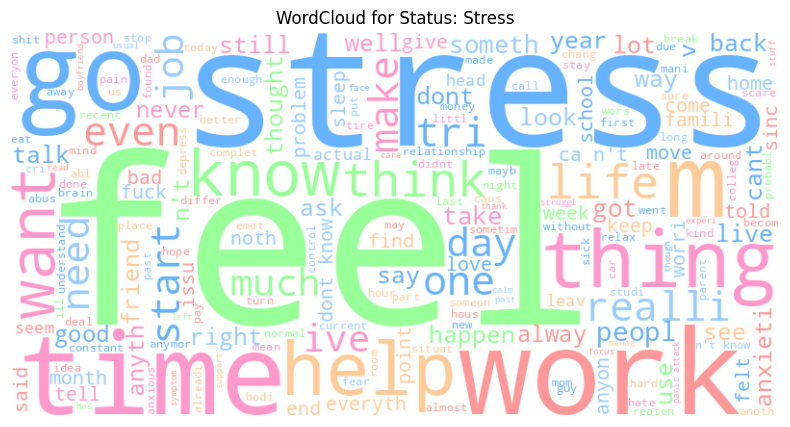

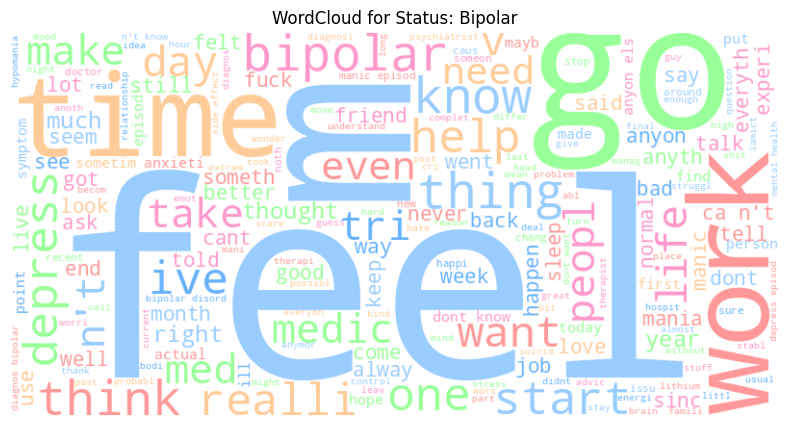

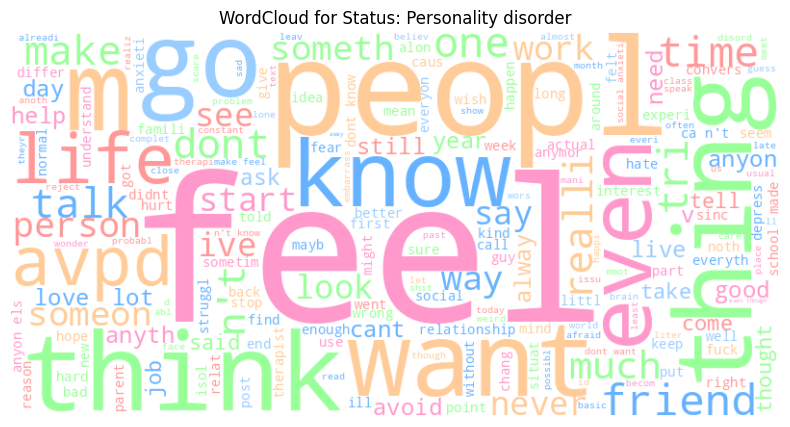

In [18]:
import random
from wordcloud import WordCloud

statuses = mentalcleaned['status'].unique()

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']

# Define a color function
def color_func(word, font_size, position, orientation, random_state=101, **kwargs):
    return random.choice(colors)

for status in statuses:
    # Filter the tokens data for the current status
    tokens_data = ' '.join(mentalcleaned[mentalcleaned['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist())

    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title(f'WordCloud for Status: {status}')
    plt.show()

### Vectorization

#### 1. Term Frequency

In [19]:
mentalcleaned.head(2)

,statement,status,statement_len,statement_cleaned,status_encoded,tokens
0,oh my gosh,Anxiety,3,oh gosh,0,"[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,troubl sleep confus mind restless heart tune,0,"[troubl, sleep, confus, mind, restless, heart,..."


In [20]:
x = mentalcleaned['statement_cleaned']
y = mentalcleaned['status_encoded']

print(len(x), len(y))

52681 52681


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

#Split into train & test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

47412 47412
5269 5269


In [22]:
# Create the Transform
c_vectorizer = CountVectorizer(
    stop_words='english',      # Exclude common English stop words from the vocabulary
    ngram_range=(1, 2),        # Include unigrams (1-gram) and bigrams (2-grams) in the feature extraction
    max_df=0.7,                # Ignore terms that appear in more than 70% of the documents to filter out overly common words
    max_features=50_000        # Limit the number of features (unique words/n-grams) to the 50,000 most frequent ones
)

#Tokenize and build model
c_vectorizer.fit(x_train)

CountVectorizer(max_df=0.7, max_features=50000, ngram_range=(1, 2),
                stop_words='english')

In [23]:
#Convert the text data in X_train into a document-term matrix

x_train_dtm = c_vectorizer.transform(x_train)
x_test_dtm = c_vectorizer.transform(x_test)

#### 2. TF-IDF (Term Frequency–Inverse Document Frequency)

In [24]:
texts = mentalcleaned['statement_cleaned']
target = mentalcleaned['status_encoded']

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# Calculate the length of our vocabulary
word_tokenizer = Tokenizer() #Initialize a Tokenizer object to process text
word_tokenizer.fit_on_texts(texts) #Fit the tokenizer on the given texts

vocab_length = len(word_tokenizer.word_index) + 1 #Calculate the vocabulary size (unique words + 1 for padding/indexing purposes)
vocab_length

58742

### Class Imbalance

In [26]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

r_oversampler = RandomOverSampler(random_state= 42)
x_train_resampled, y_train_resampled = r_oversampler.fit_resample(x_train_dtm, y_train)

In [27]:
print((x_train_resampled.shape), (y_train_resampled.shape))

(102816, 50000) (102816,)


### Modelling

1. #### Logistics Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                      precision    recall  f1-score   support

             Anxiety       0.82      0.81      0.82       371
             Bipolar       0.82      0.80      0.81       273
          Depression       0.71      0.68      0.69      1521
              Normal       0.89      0.94      0.92      1655
Personality disorder       0.81      0.70      0.75       114
              Stress       0.63      0.60      0.62       258
            Suicidal       0.64      0.64      0.64      1077

            accuracy                           0.77      5269
           macro avg       0.76      0.74      0.75      5269
        weighted avg       0.76      0.77      0.76      5269



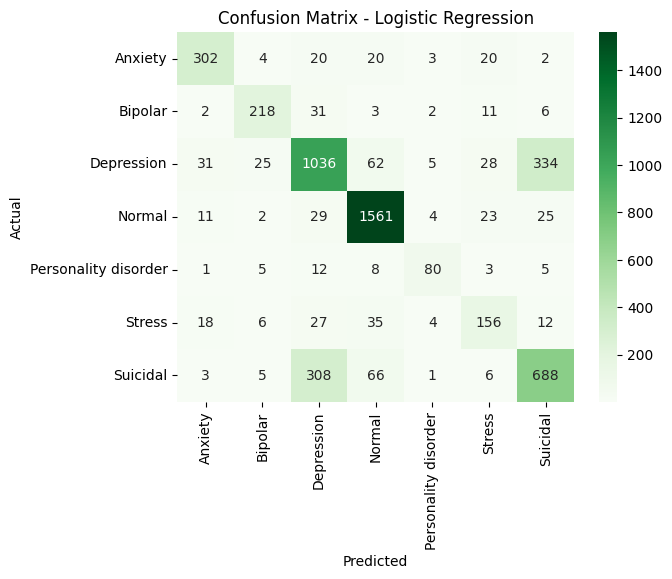

In [29]:
import seaborn as sns

# Initialize and train the Logistic Regression model
lr_clf = LogisticRegression(random_state=42).fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = lr_clf.predict(x_test_dtm)

# Get class labels from the label encoder
labels = l_encoder.classes_

# Generate and print classification report
print(classification_report(y_test, y_pred, target_names=labels))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#### 2. XGBClassifier

In [30]:
import xgboost
print(xgboost.__version__)

2.1.4


In [ ]:
# Initialize and train the XGBClassifier with early stopping

xgb_clf = XGBClassifier(
    n_estimators = 300,   # Number of boosting rounds (trees)
    learning_rate = 0.1,  #Step size shrinkage to prevent overfitting
    verbosity = 1,        #Controls the logging output: # 0 = silent, 1 = progress messages, 2 = full debugging output
    early_stopping_rounds = 10, #Stops training if validation score doesn't improve for 10 rounds
    tree_method='hist', #'gpu_hist' enables GPU acceleration for faster training
    device='cuda'
    )
xgb_clf.fit(x_train_resampled,y_train_resampled, eval_set = [(x_test_dtm,y_test)])

#xgb_clf = XGBClassifier(n_estimators= 1_000, learning_rate=0.05, tree_method='gpu_hist')
#xgb_clf.fit(x_train_resampled, y_train_resampled, early_stopping_rounds=5, eval_set=[(x_test_dtm, y_test)], verbose=False)

# Make predictions on the test data
y_pred3 = xgb_clf.predict(x_test_dtm)

# Get class labels from the label encoder
labels = l_encoder.classes_

# Generate and print classification report
print(classification_report(y_test, y_pred3, target_names=labels))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBClassifier')
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:15] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:15] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.84182
[1]	validation_0-mlogloss:1.75746
[2]	validation_0-mlogloss:1.68607
[3]	validation_0-mlogloss:1.62385
[4]	validation_0-mlogloss:1.57003
[5]	validation_0-mlogloss:1.52156
[6]	validation_0-mlogloss:1.47837
[7]	validation_0-mlogloss:1.43981
[8]	validation_0-mlogloss:1.40459
[9]	validation_0-mlogloss:1.37306
[10]	validation_0-mlogloss:1.34359
[11]	validation_0-mlogloss:1.31718
[12]	validation_0-mlogloss:1.29146
[13]	validation_0-mlogloss:1.26834
[14]	validation_0-mlogloss:1.24648
[15]	validation_0-mlogloss:1.22592
[16]	validation_0-mlogloss:1.20699
[17]	validation_0-mlogloss:1.19005
[18]	validation_0-mlogloss:1.17292
[19]	validation_0-mlogloss:1.15797
[20]	validation_0-mlogloss:1.14402
[21]	validation_0-mlogloss:1.13034
[22]	validation_0-mlogloss:1.11747
[23]	validation_0-mlogloss:1.10516
[24]	validation_0-mlogloss:1.09368
[25]	validation_0-mlogloss:1.08351
[26]	validation_0-mlogloss:1.07375
[27]	validation_0-mlogloss:1.06417
[28]	validation_0-mlogloss:1.0

In [ ]:
#Quick re-check of our encoding before performing DistilBERT
mentalcleaned['status_encoded'].value_counts()

#### DistilBERT

In [ ]:
!pip install transformers

import transformers as ppb

In [ ]:
#Restart the model from before tokenisation

mentalcleaned_DB.head()

In [ ]:
mentalcleaned_DB = mentalcleaned.drop(columns=['tokens', 'statement_cleaned'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

data_train, data_test = train_test_split(mentalcleaned_DB, train_size=0.8,stratify=mentalcleaned_DB['status_encoded'])

In [ ]:
#Quick Check

train_summary = data_train.groupby('status').size().to_frame('count').reset_index()
train_summary['%'] = round(train_summary['count']/train_summary['count'].sum()*100, 2)
train_summary

In [ ]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    'train': Dataset.from_pandas(data_train),
    'test': Dataset.from_pandas(data_test)
})

In [ ]:
dataset['train'][11]

##### Tokenize the DistilBERT data

In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer

checkpoint = 'distilbert/distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(mentalcleaned_DB):
    return tokenizer(mentalcleaned_DB['statement'], padding='max_length', truncation=True)

In [ ]:
tokenized_datasets = dataset.map(tokenize_function, batched=True)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

##### Train a classifier

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=7,
                                                           problem_type='single_label_classification')

In [ ]:
def compute_metrics(y_pred_):
    f1_ = evaluate.load('f1')
    accuracy_ = evaluate.load('accuracy')
    logits, status_encoded = y_pred_
    y_pred = np.argmax(logits, axis=-1)
    f1 = f1_.compute(predictions=y_pred, references=status_encoded, average='micro')
    accuracy = accuracy_.compute(predictions=y_pred, references=status_encoded)
    return {'f1': f1, 'accuracy': accuracy}

In [ ]:
from transformers import TrainingArguments, Trainer

batch_size = 16
training_args = TrainingArguments('train', num_train_epochs=3, evaluation_strategy='epoch',
                                 learning_rate=5e-5,
                                 per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                 report_to='none')

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()